In [1]:
%run functions_for_ESR_data_processing.ipynb
%matplotlib inline

<ErrorbarContainer object of 3 artists>

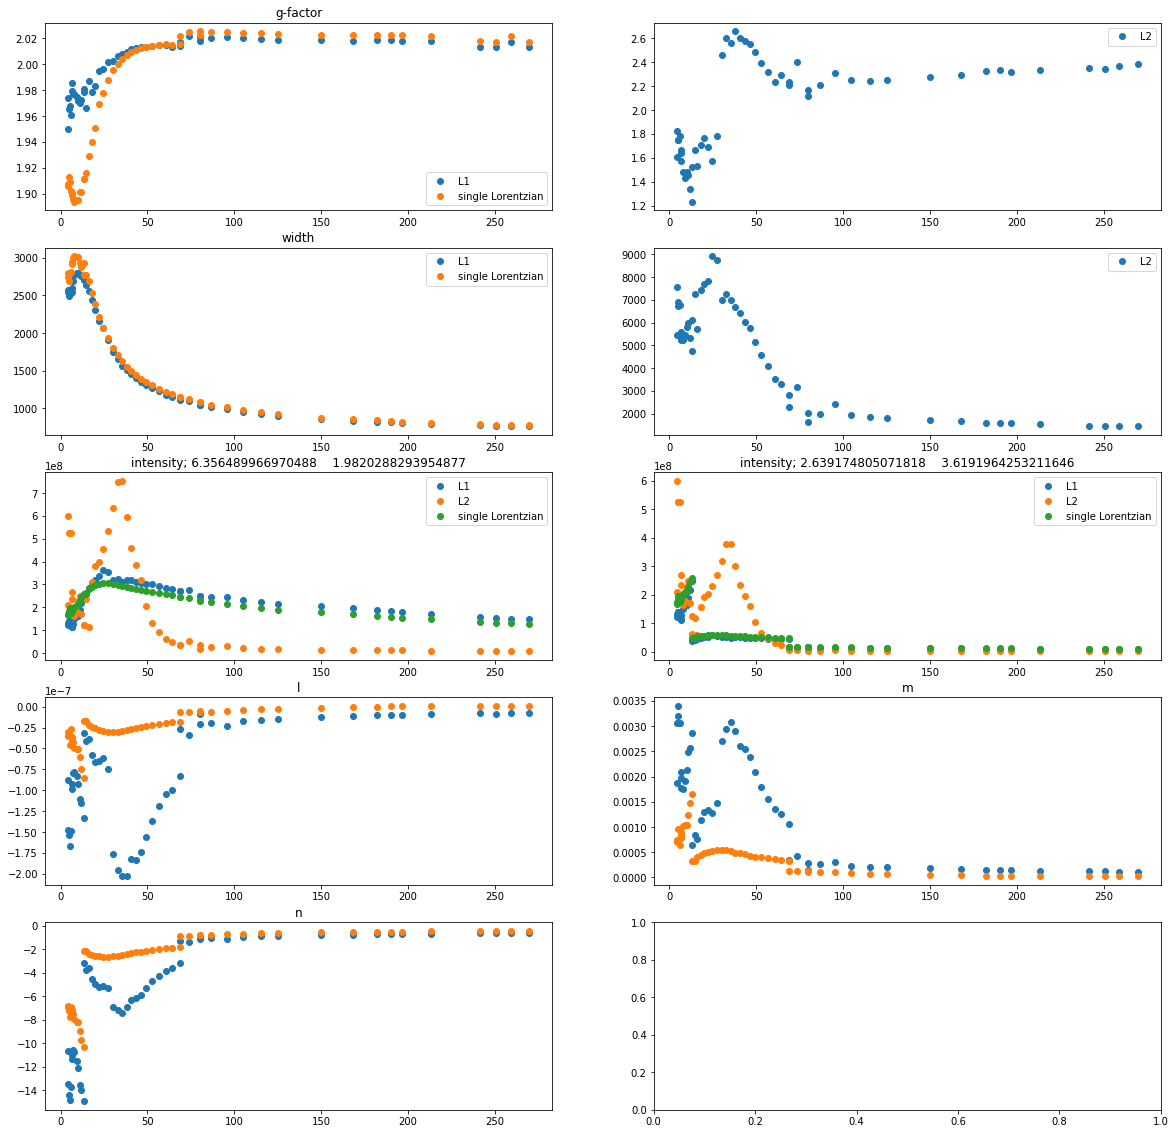

In [2]:
#########################################################################################################

# what compound do you want to look at? Choose either 'Na' or 'Li'
compound = 'Li'

#########################################################################################################

# import the temperature dependent fit results
folder_general = "C:\\Users\\F25_1.307_b\\Box Sync\\Klingeler_Masterarbeit\\howardevansite\\"

if compound == 'Li':
    folder_specific = 'LiCuFe2(VO4)3 powder\\X-band\\21_02_2019'
    filename1 = folder_general + folder_specific + '\\python fits\\python_fit_results.txt'
    filename2 = folder_general + folder_specific + '\\python fits\\initialguess.txt'
    
    T, B01, dB01, gamma1, dgamma1, A1, dA1, B02, dB02, gamma2, dgamma2, A2, dA2, l, dl, m, dm, n, dn, freq = data_import(filename1, 3)
    A3 = np.nan * np.zeros(len(T))
    Tone, B0, dB0, gamma, dgamma, A, dA, l0, dl0, m0, dm0, n0, dn0, freq0 = data_import(filename2, 3)

        
elif compound == 'Na':
    folder_specific = 'NaCuFe2(VO4)3 powder\\X-band\\19_02_2019'
    filename1 = folder_general + folder_specific + '\\python fits\\python_fit_results_constrained_background1.txt'
    filename2 = folder_general + folder_specific + '\\python fits\\initialguess.txt'
    
    T, B01, dB01, gamma1, dgamma1, A1, dA1, B02, dB02, gamma2, dgamma2, A2, dA2, B03, dB03, gamma3, dgamma3, A3, dA3, l, dl, m, dm, n, dn, freq = data_import(filename1, 3)
    Tone, B0, dB0, gamma, dgamma, A, dA, l0, dl0, m0, dm0, n0, dn0, freq0 = data_import(filename2, 3)

    
else:
    raise Exception('The variable "compound" can only take Li or Na (and they have to be strings!). You entered: {}'.format(compound))

    
dB0 = abs(B0-B01)
dA = abs(A - A1)
dgamma = abs(gamma - gamma1)

##################################################################################
lower_limit = 0
upper_limit = 300
##################################################################################

mask = [all( [(lower_limit<T)[i], (T<upper_limit)[i]] ) for i in np.arange(len(T)) ]
maskone = [all( [(lower_limit<Tone)[i], (Tone<upper_limit)[i]] ) for i in np.arange(len(Tone)) ]

fig, axes = plt.subplots(5, 2, sharex=False, sharey=False, figsize=(20,20))

g1, g_err1 = [10000*freq/B01/13.98, 10000*freq*np.sqrt(dB01)/B01/B01/13.98]
g2, g_err2 = [10000*freq/B02/13.98, 10000*freq*np.sqrt(dB02)/B02/B02/13.98]
g, g_err = [10000*freq0/B0/13.98, 10000*freq0*dB0/B0/B0/13.98]

axes[0,0].set_title('g-factor')
axes[0,0].errorbar(T[mask], g1[mask], fmt = 'o')
axes[0,0].errorbar(Tone[maskone], g[maskone], fmt = 'o')
axes[0,0].legend(['L1', 'single Lorentzian'])

axes[0,1].errorbar(T[mask], g2[mask], fmt = 'o')
axes[0,1].legend(['L2'])



#axes[0,1].errorbar(T[mask], g[mask], yerr = g_err[mask], fmt='o')
#axes[0].legend(['1st peak', '2nd peak', '3rd peak'])
#axes[0].set_ylim(1.9,2.05)


data1 = np.array([gamma1, dgamma1])
data2 = np.array([gamma2, dgamma2])
data3 = np.array([gamma, dgamma])

axes[1,0].set_title('width')
axes[1,0].errorbar(T[mask], data1[0, mask], fmt='o')
axes[1,0].errorbar(Tone[maskone], data3[0, maskone], fmt='o')
axes[1,0].legend(['L1', 'single Lorentzian'])

axes[1,1].errorbar(Tone[maskone], data2[0, maskone], fmt='o')
axes[1,1].legend(['L2'])


#axes[1].legend(['1st peak', '2nd peak', '3rd peak', 'single Lorentzian'])
#axes[1,1].errorbar(T[mask], data3[0, mask], yerr = data3[1, mask], fmt='o')


if compound == 'Li':
    data1, err1 = rescale_A_Li( A1, dA1 )
    data2, err2 = rescale_A_Li( A2, dA2 )
    data3, err3 = rescale_A_Li( A, dA )
else:
    data1, err1 = rescale_A_Na( A1, dA1 )
    data2, err2 = rescale_A_Na( A2, dA2 )
    data3, err3 = rescale_A_Na( A, dA )

#err3 = abs(data1-data3)
    
    
axes[2,0].set_title('intensity; ' + str(A1[13]/A1[14]) + '    ' + str(A2[13]/A2[14]))
axes[2,0].errorbar(T[mask], data1[mask], fmt='o')
axes[2,0].errorbar(T[mask], data2[mask], fmt='o')
axes[2,0].errorbar(Tone[maskone], data3[maskone], fmt='o')
axes[2,0].legend(['L1', 'L2', 'single Lorentzian'])

axes[2,1].set_title('intensity; ' + str(A1[34]/A1[35]) + '    ' + str(A2[34]/A2[35]))
axes[2,1].errorbar(T[mask], A1[mask], fmt='o')
axes[2,1].errorbar(T[mask], A2[mask], fmt='o')
axes[2,1].errorbar(Tone[maskone], A[maskone], fmt='o')
axes[2,1].legend(['L1', 'L2', 'single Lorentzian'])



axes[3,0].set_title('l')
axes[3,0].errorbar(T[mask], l[mask], yerr = dl[mask], fmt='o')
axes[3,0].errorbar(Tone[maskone], l0[maskone], yerr = dl0[maskone], fmt='o')

axes[3,1].set_title('m')
axes[3,1].errorbar(T[mask], m[mask], yerr = dm[mask], fmt='o')
axes[3,1].errorbar(Tone[maskone], m0[maskone], yerr = dm0[maskone], fmt='o')

axes[4,0].set_title('n')
axes[4,0].errorbar(T[mask], n[mask], yerr = dn[mask], fmt='o')
axes[4,0].errorbar(Tone[maskone], n0[maskone], yerr = dn0[maskone], fmt='o')



#g3, g_err3 = [10000*freq/B03/13.98, 10000*freq*dB03/B03/B03/13.98]
#axes[4,1].set_title('L3')
#axes[4,1].errorbar(T[mask], g3[mask], yerr = g_err3[mask], fmt='o')


In [ ]:
data = [Tone, B0, dB0, gamma, dgamma, g, g_err, data3, err3,
        #B02[:,0], B02[:,1], gamma2[:,0], gamma2[:,1], A2[:,0], A2[:,1], 
        #B03[:,0], B03[:,1], gamma3[:,0], gamma3[:,1], A3[:,0], A3[:,1],
       l0, dl0, m0, dm0, n, dn, freq0]        
names = ['T', 'B0', 'delta B0', 'gamma', 'delta gamma', 'eff g-factor', 'delta g', 'intensity', 'delta intensity',
        #'B02', 'delta B02', 'gamma2', 'delta gamma2', 'intensity2', 'delta intensity2',
        # 'B03', 'delta B03', 'gamma3', 'delta gamma3', 'intensity3', 'delta intensity3',
         'l', 'dl', 'm', 'dm', 'n', 'dn', 'frequency']
units = ['K', 'G', 'G', 'G', 'G','', '', 'a.u.', 'a.u.', 
         #'G', 'G', 'G', 'G', 'a.u.', 'a.u.',
         #'G', 'G', 'G', 'G', 'a.u.', 'a.u.',
         '', '', '', '', '', '', 'GHz']
comments = ['', '', '', '', '', '','', '', '',
            #'', '', '', '', '', '',
            #'', '', '', '', '', '',
            '', '', '', '', '', '', '']
filename = folder_general+folder_specific+'\\python fits\\python_fit_results_single_Lorentzian.txt'

#save(data, names, units, comments, filename)

IndexError: index 6 is out of bounds for axis 0 with size 5

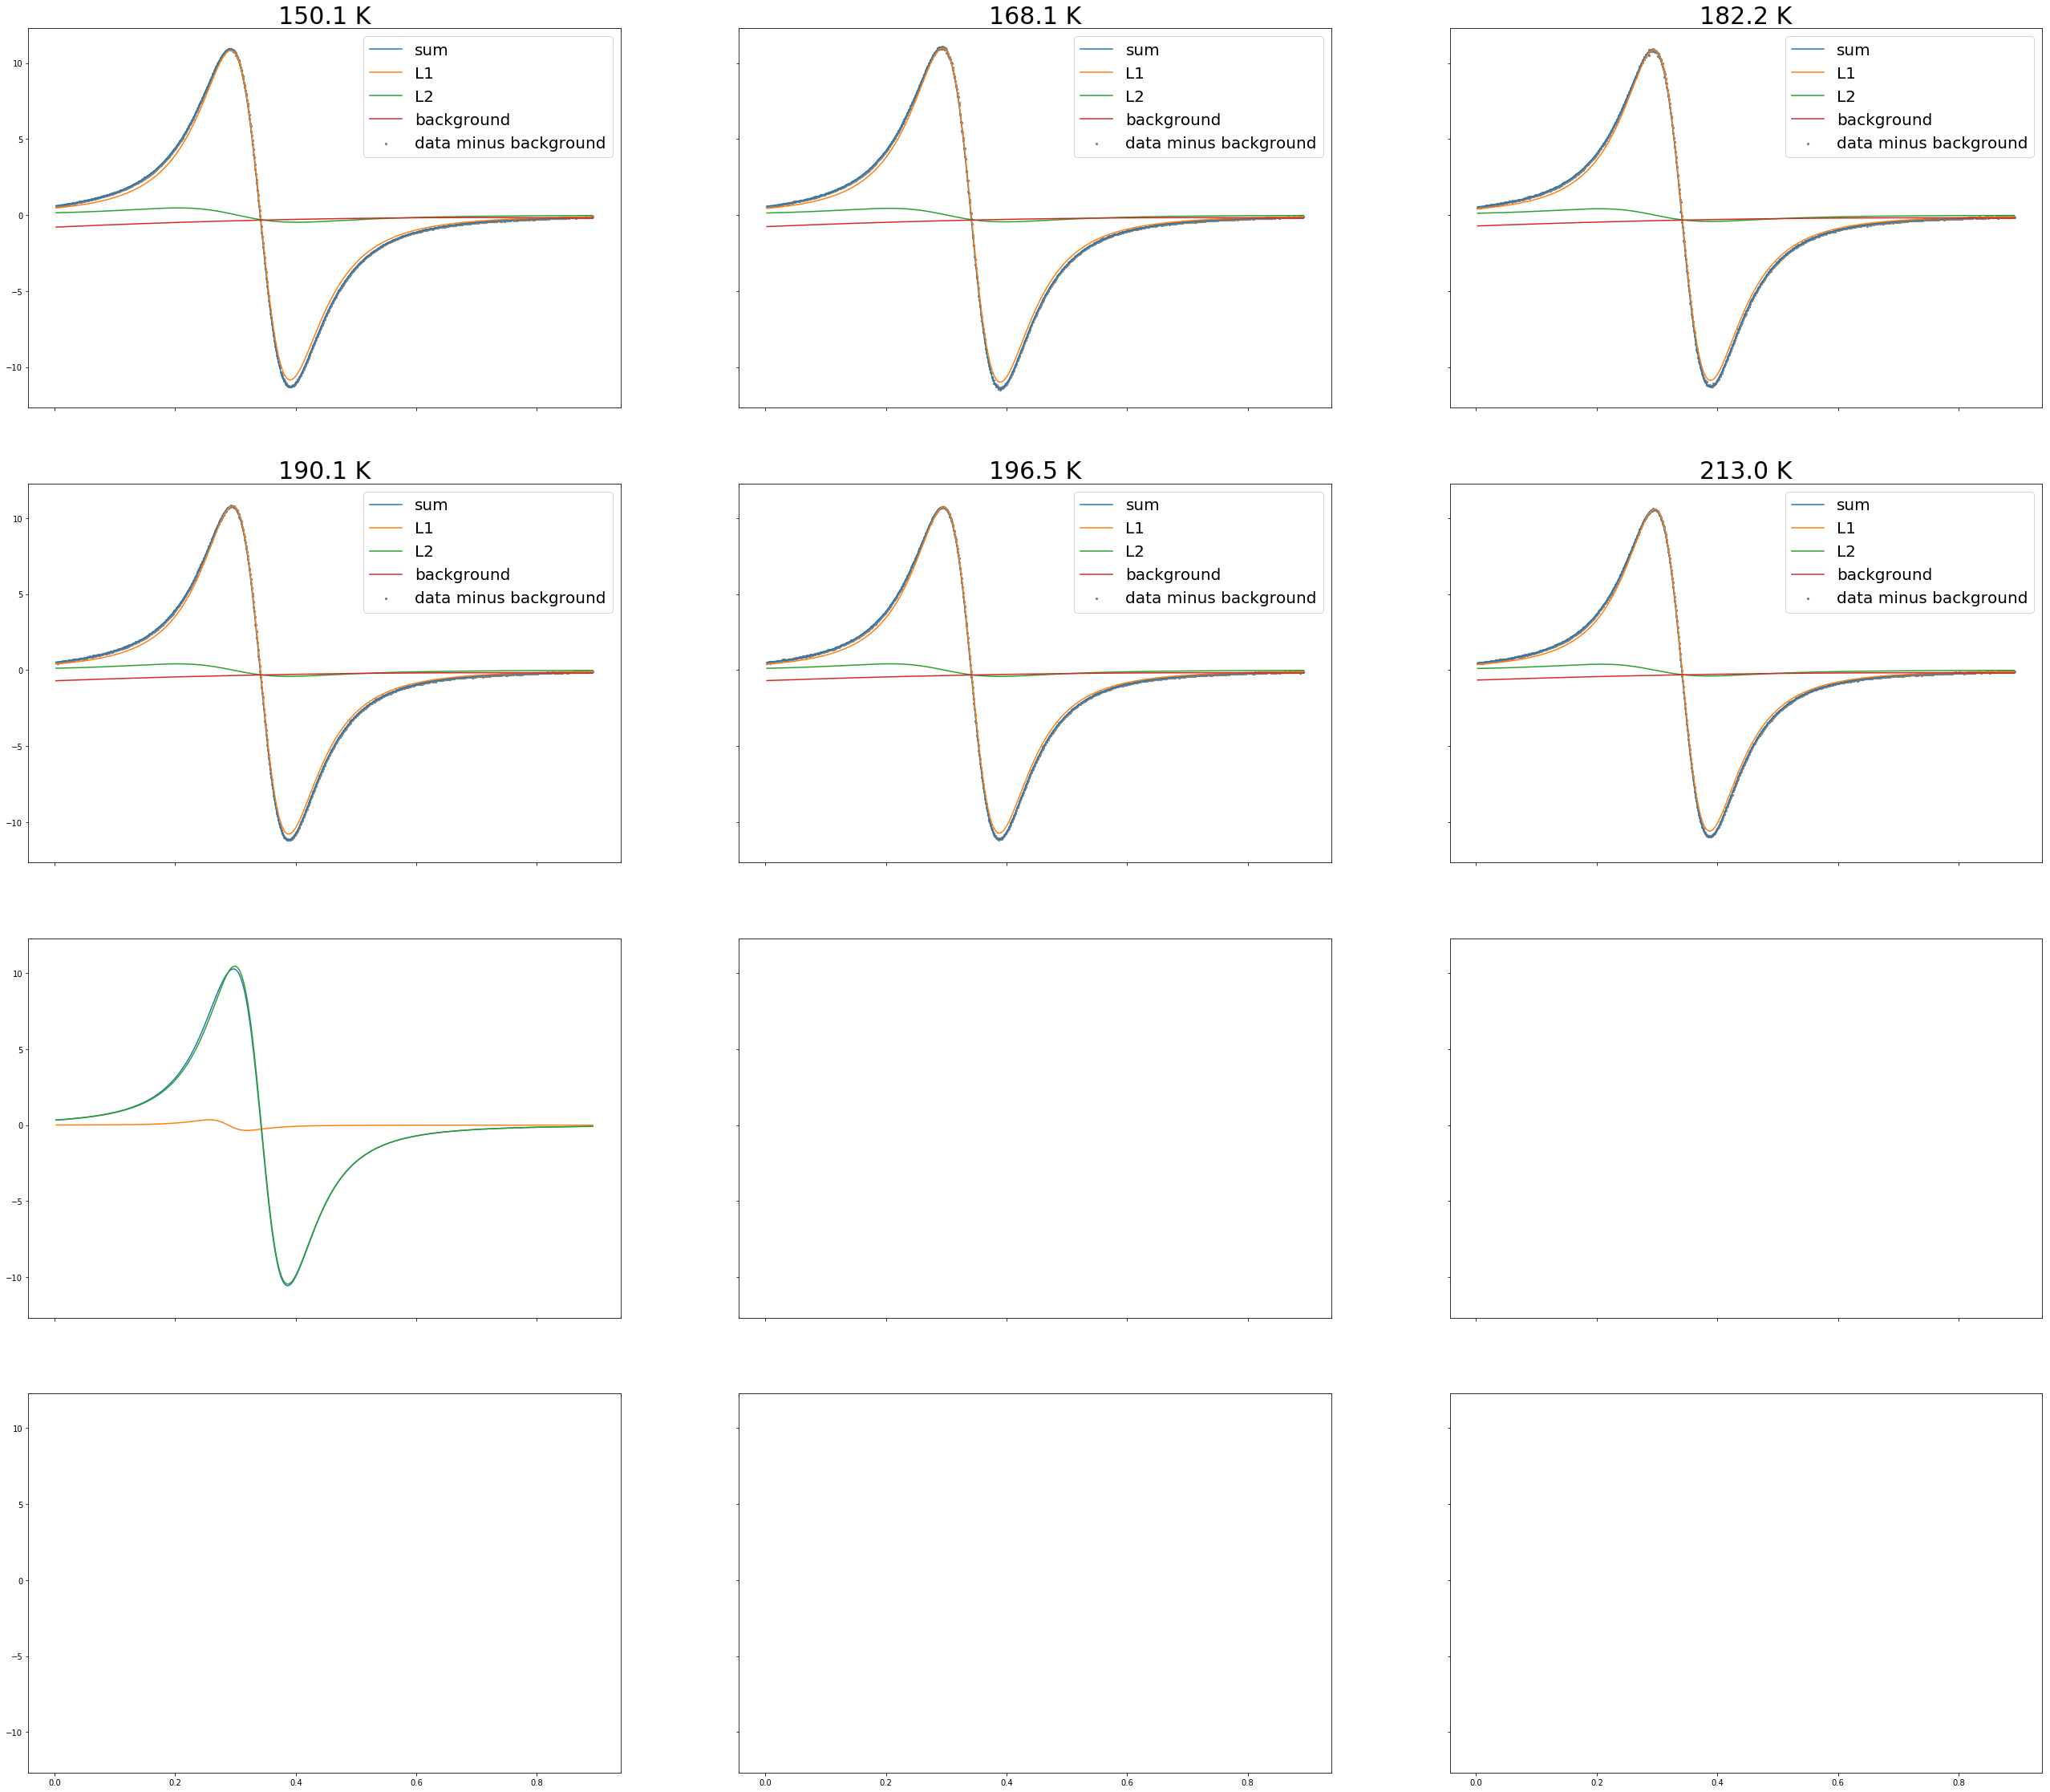

In [5]:
%run functions_for_ESR_data_processing.ipynb
% matplotlib inline
# plot_fits(temp, compound, number of columns, grid, raw, additional_folder, one_Lor)

# temp: single temperature of list with 2 temperatures which give upper and lower bound
# compound: either 'Na' or 'Li'
# number of columns: gives the number of columns (important for several plots) - decides over size of individual graphs
# grid: 'yes' if you want to show grid lines, anything else if you don't
# raw: 'yes' if you want to show the actual raw data (even without background subtracted); anything else if you don't
# additional_folder: if the individual_fit_curves files are not directly in "...\\individual_fit_curves" here you
# have to enter the additional folder name (if they are directly here enter 'no')
# one_Lor: do you also want to show the fit of one Lorentzian: 'yes' or 'no'
plot_fits([150, 300], 'Li', 3, 'no', 'no', 'no', 'no')

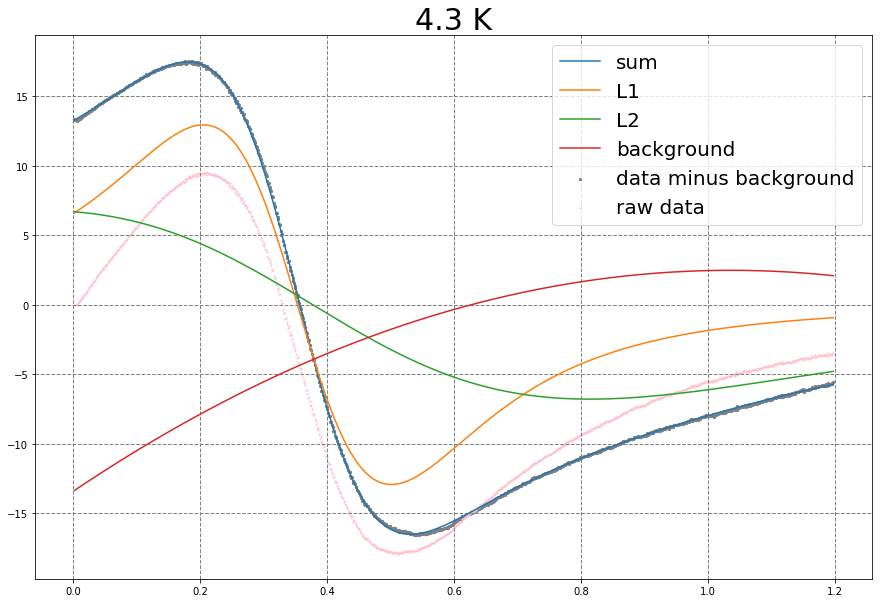

In [14]:
%run functions_for_ESR_data_processing.ipynb
%matplotlib inline
plot_fits(3, 'Li', 3, 'yes', 'yes', 'no', 'no')